In [1]:
# ROBERT HEETER
# ELEC 378 Machine Learning
# 17 February 2023

# PROBLEM SET 5


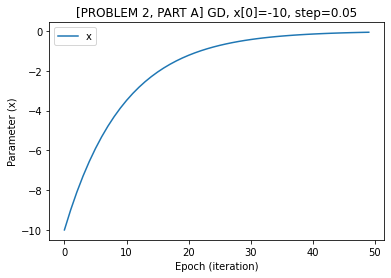

In [2]:
# PROBLEM 1

import numpy as np
import matplotlib.pyplot as plt

# PART A

T = 50 # number of epochs
x = np.empty((T, 1))
x[0] = -10 # initial guess

grad_L = lambda x: np.array([2*x[0]])
mu = 0.05

for t in range(1,T):
    x[t] = x[t-1] - mu*grad_L(x[t-1])

fig,ax = plt.subplots(1,1)
ax.plot(x[:,0])
ax.set_xlabel('Epoch (iteration)')
ax.set_ylabel('Parameter (x)')
ax.legend(('x'))
plt.title('[PROBLEM 2, PART A] GD, x[0]=-10, step=0.05')
plt.show()


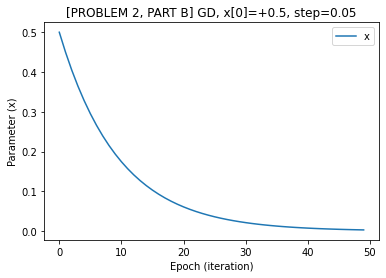

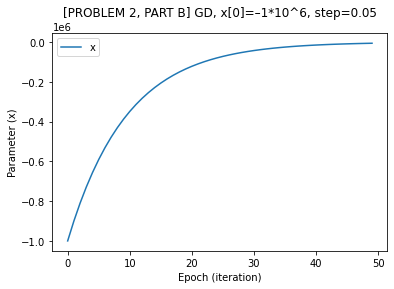

In [3]:
# PART B

x = []
T = 50 # number of epochs
x = np.empty((T, 1))
x[0] = 0.5 # initial guess

grad_L = lambda x: np.array([2*x[0]])
mu = 0.05

for t in range(1,T):
    x[t] = x[t-1] - mu*grad_L(x[t-1])

fig,ax = plt.subplots(1,1)
ax.plot(x[:,0])
ax.set_xlabel('Epoch (iteration)')
ax.set_ylabel('Parameter (x)')
ax.legend(('x'))
plt.title('[PROBLEM 2, PART B] GD, x[0]=+0.5, step=0.05')
plt.show()

x = []
T = 50 # number of epochs
x = np.empty((T, 1))
x[0] = -1*(10**6) # initial guess

grad_L = lambda x: np.array([2*x[0]])
mu = 0.05

for t in range(1,T):
    x[t] = x[t-1] - mu*grad_L(x[t-1])

fig,ax = plt.subplots(1,1)
ax.plot(x[:,0])
ax.set_xlabel('Epoch (iteration)')
ax.set_ylabel('Parameter (x)')
ax.legend(('x'))
plt.title('[PROBLEM 2, PART B] GD, x[0]=–1*10^6, step=0.05')
plt.show()


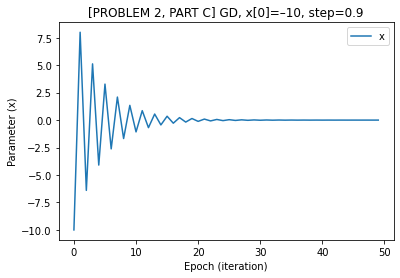

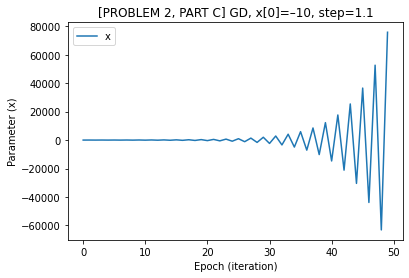

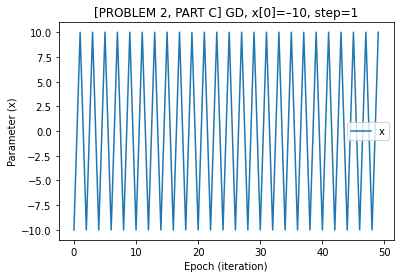

In [4]:
# PART C

x = []
T = 50 # number of epochs
x = np.empty((T, 1))
x[0] = -10 # initial guess

grad_L = lambda x: np.array([2*x[0]])
mu = 0.9

for t in range(1,T):
    x[t] = x[t-1] - mu*grad_L(x[t-1])

fig,ax = plt.subplots(1,1)
ax.plot(x[:,0])
ax.set_xlabel('Epoch (iteration)')
ax.set_ylabel('Parameter (x)')
ax.legend(('x'))
plt.title('[PROBLEM 2, PART C] GD, x[0]=–10, step=0.9')
plt.show()

x = []
T = 50 # number of epochs
x = np.empty((T, 1))
x[0] = -10 # initial guess

grad_L = lambda x: np.array([2*x[0]])
mu = 1.1

for t in range(1,T):
    x[t] = x[t-1] - mu*grad_L(x[t-1])

fig,ax = plt.subplots(1,1)
ax.plot(x[:,0])
ax.set_xlabel('Epoch (iteration)')
ax.set_ylabel('Parameter (x)')
ax.legend(('x'))
plt.title('[PROBLEM 2, PART C] GD, x[0]=–10, step=1.1')
plt.show()

x = []
T = 50 # number of epochs
x = np.empty((T, 1))
x[0] = -10 # initial guess

grad_L = lambda x: np.array([2*x[0]])
mu = 1

for t in range(1,T):
    x[t] = x[t-1] - mu*grad_L(x[t-1])

fig,ax = plt.subplots(1,1)
ax.plot(x[:,0])
ax.set_xlabel('Epoch (iteration)')
ax.set_ylabel('Parameter (x)')
ax.legend(('x'))
plt.title('[PROBLEM 2, PART C] GD, x[0]=–10, step=1')
plt.show()


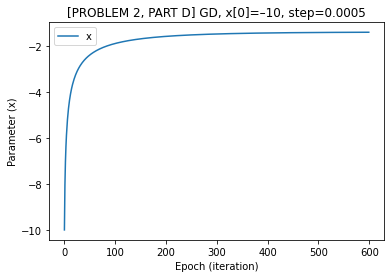

In [5]:
# PART D

x = []
T = 600 # number of epochs
x = np.empty((T, 1))
x[0] = -10 # initial guess

grad_L = lambda x: np.array([4*(x[0]**3) - 10*x[0] - 3])
mu = 0.0005

for t in range(1,T):
    x[t] = x[t-1] - mu*grad_L(x[t-1])

fig,ax = plt.subplots(1,1)
ax.plot(x[:,0])
ax.set_xlabel('Epoch (iteration)')
ax.set_ylabel('Parameter (x)')
ax.legend(('x'))
plt.title('[PROBLEM 2, PART D] GD, x[0]=–10, step=0.0005')
plt.show()


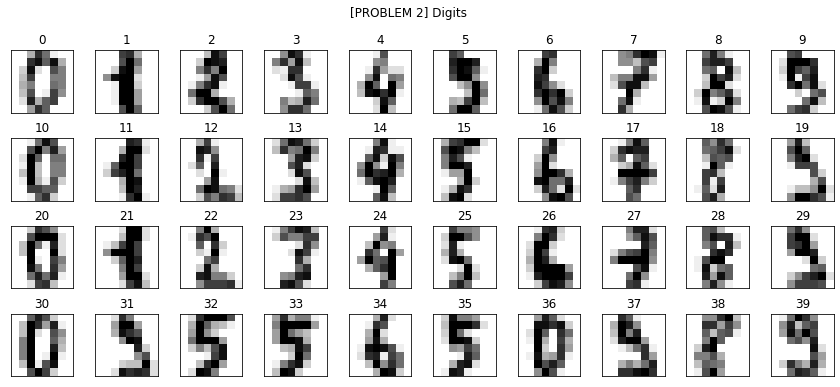

In [6]:
# PROBLEM 2

import numpy as np
import matplotlib.pyplot as plt

# load the data matrix containing as each row an unwrapped 
# array representation of an image of a handwritten digit
digits = np.load('digits.npy')

# show digits
fig, axes = plt.subplots(4, 10, figsize=(15, 6),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.4, wspace=0.1))
fig.suptitle('[PROBLEM 2] Digits')
for i, ax in enumerate(axes.flat):
    ax.set_title(i)
    ax.imshow(digits[i].reshape(8, 8),cmap='binary', interpolation='nearest',clim=(0, 16))
plt.show()

In [7]:
from sklearn.cluster import AgglomerativeClustering

X = digits
clst = AgglomerativeClustering(n_clusters=None,distance_threshold=0).fit(X)


In [8]:
d = [0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,9,5,5,6,5,0,9,8,9] # digit values

cls = [] # string clusters
cdig = [] # clustered digits
for c in clst.children_:
    if c[0]<len(d) and c[1]<len(d):
        cdig.append([d[c[0]],d[c[1]]])
        cls.append('cluster: ' + str(d[c[0]]) + ',' + str(d[c[1]]))
    if c[0]<len(d) and c[1]>=len(d):
        sc = c[1]-len(d) # subcluster index
        cdig.append([d[c[0]],cdig[sc]])
        cls.append('supercluster: ' + str(d[c[0]]) + ' with cluster ' + str(cdig[sc]))
    if c[0]>=len(d) and c[1]<len(d):
        sc = c[0]-len(d) # subcluster index
        cdig.append([cdig[sc],d[c[1]]])
        cls.append('supercluster: cluster ' + str(cdig[sc]) + ' with ' + str(d[c[1]]))
    if c[0]>=len(d) and c[1]>=len(d):
        sc0 = c[0]-len(d) # subcluster index
        sc1 = c[1]-len(d) # subcluster index
        cdig.append([cdig[sc0],cdig[sc1]])
        cls.append('supercluster: cluster' + str(cdig[sc0]) + ' with cluster ' + str(cdig[sc1]))

print('SIMPLIFIED CLUSTER ANNOTATIONS')
for i in range(0,len(cls)):
    print('#' + str(i) + ' ' + cls[i] + '\n')
    

SIMPLIFIED CLUSTER ANNOTATIONS
#0 cluster: 5,5

#1 cluster: 6,6

#2 cluster: 1,1

#3 cluster: 9,9

#4 cluster: 0,0

#5 cluster: 0,0

#6 supercluster: 0 with cluster [0, 0]

#7 supercluster: 9 with cluster [9, 9]

#8 cluster: 6,6

#9 cluster: 8,8

#10 cluster: 2,2

#11 cluster: 8,8

#12 cluster: 4,4

#13 cluster: 3,3

#14 cluster: 5,5

#15 cluster: 5,9

#16 cluster: 3,9

#17 supercluster: 4 with cluster [4, 4]

#18 supercluster: cluster[0, 0] with cluster [0, [0, 0]]

#19 supercluster: cluster[5, 5] with cluster [5, 5]

#20 supercluster: 9 with cluster [9, [9, 9]]

#21 cluster: 7,7

#22 supercluster: 1 with cluster [1, 1]

#23 supercluster: 5 with cluster [8, 8]

#24 supercluster: cluster[6, 6] with cluster [6, 6]

#25 supercluster: cluster[3, 9] with cluster [9, [9, [9, 9]]]

#26 supercluster: 2 with cluster [8, 8]

#27 supercluster: 7 with cluster [7, 7]

#28 supercluster: cluster[5, 9] with cluster [[3, 9], [9, [9, [9, 9]]]]

#29 supercluster: cluster[3, 3] with cluster [7, [7, 7]]



In [9]:
cls = []
for c in clst.children_:
    if c[0]<len(d) and c[1]<len(d):
        cls.append('cluster' + str(c) + ': ' + str(d[c[0]]) + ',' + str(d[c[1]]))
    if c[0]<len(d) and c[1]>=len(d):
        sc = c[1]-len(d) # subcluster index
        cls.append('supercluster' + str(c) + ': ' + str(d[c[0]]) + ' with cluster[' + str(sc) + '] (' + str(cls[sc]) + ')')
    if c[0]>=len(d) and c[1]<len(d):
        sc = c[0]-len(d) # subcluster index
        cls.append('supercluster' + str(c) + ': cluster[' + str(sc) + '] (' + str(cls[sc]) + ') with ' + str(d[c[1]]))
    if c[0]>=len(d) and c[1]>=len(d):
        sc0 = c[0]-len(d) # subcluster index
        sc1 = c[1]-len(d) # subcluster index
        cls.append('supercluster' + str(c) + ': cluster[' + str(sc0) + '] (' + str(cls[sc0]) + ') with cluster[' + str(sc1) + '] (' + str(cls[sc1]) + ')')

print('DETAILED CLUSTER ANNOTATIONS')
for i in range(0,len(cls)):
    print('#' + str(i) + ' ' + cls[i] + '\n')
    

DETAILED CLUSTER ANNOTATIONS
#0 cluster[33 35]: 5,5

#1 cluster[ 6 26]: 6,6

#2 cluster[11 21]: 1,1

#3 cluster[19 31]: 9,9

#4 cluster[20 36]: 0,0

#5 cluster[ 0 30]: 0,0

#6 supercluster[10 44]: 0 with cluster[4] (cluster[20 36]: 0,0)

#7 supercluster[29 43]: 9 with cluster[3] (cluster[19 31]: 9,9)

#8 cluster[16 34]: 6,6

#9 cluster[ 8 28]: 8,8

#10 cluster[12 22]: 2,2

#11 cluster[18 38]: 8,8

#12 cluster[ 4 24]: 4,4

#13 cluster[13 23]: 3,3

#14 cluster[15 32]: 5,5

#15 cluster[5 9]: 5,9

#16 cluster[ 3 39]: 3,9

#17 supercluster[14 52]: 4 with cluster[12] (cluster[ 4 24]: 4,4)

#18 supercluster[45 46]: cluster[5] (cluster[ 0 30]: 0,0) with cluster[6] (supercluster[10 44]: 0 with cluster[4] (cluster[20 36]: 0,0))

#19 supercluster[40 54]: cluster[0] (cluster[33 35]: 5,5) with cluster[14] (cluster[15 32]: 5,5)

#20 supercluster[37 47]: 9 with cluster[7] (supercluster[29 43]: 9 with cluster[3] (cluster[19 31]: 9,9))

#21 cluster[17 27]: 7,7

#22 supercluster[ 1 42]: 1 with cluster[2

In [10]:
print('RAW CLUSTERS')
for c in clst.children_:
    print(str(c) + '\n')
    

RAW CLUSTERS
[33 35]

[ 6 26]

[11 21]

[19 31]

[20 36]

[ 0 30]

[10 44]

[29 43]

[16 34]

[ 8 28]

[12 22]

[18 38]

[ 4 24]

[13 23]

[15 32]

[5 9]

[ 3 39]

[14 52]

[45 46]

[40 54]

[37 47]

[17 27]

[ 1 42]

[25 51]

[41 48]

[56 60]

[ 2 49]

[ 7 61]

[55 65]

[53 67]

[59 63]

[66 69]

[57 62]

[50 68]

[64 72]

[70 71]

[58 75]

[73 76]

[74 77]

